Quickstart tutorial
======

## Summary

This notebook provides the basics of the microeconomic, agent-type class which is fundamental for HARK.

____
### Structure:

- **Part 1**: basics of the perfect-foresight agent model
- **Part 2**: more advanced methods for the perfect-foresight agent model

### Learning outcomes:
- **Part 1**:
    - Learn how to declare basic agent-type objects
    - Learn solution methods for the agent-type objects
    - Plot value function and consumption function
    - Learn how to simulate the agent-type objects
    - Plot value function
- **Part 2**:
    - Learn how to build life-cycle models
    - Learn more advanced simulation techniques
    - Learn advanced plots
____
## Introduction to the consumer problem

HARK AgentType classes were designed to solve the consumer problem. 

In the most basic formulation, the consumer problem is given as follows. The consumer lives T+1 periods (T $\leq \infty$) and during her lifetime receives the same income $Y$. In each period t (0$\leq$ t$\leq$ T) she can spend it on the consumption $C_t$ or invest in an asset $A_t$ with risk free interest rate R. She maximize the lifetime utility, by solving the following Bellman equation defined on the "cash in hand" state space $M_t = C_t +A_t$:   

For $t<T+1$
\begin{eqnarray*}
V_t(M_t) &=& \max_{C_t} U(C_t) + \beta V_{t+1}(M_{t+1}), \\
& s.t. & \\
A_t &=& M_t - C_t, \\
M_{t+1} &=& R (M_{t}-C_{t}) + Y, \\
\end{eqnarray*}
for $t \geq T+1$
\begin{eqnarray*}
V_t(M_t) &=& 0
\end{eqnarray*}

Where $\beta <1 $ is a discount factor and $U(C)$ is a standard CRRA utility function:
$$
U(C)=\frac{C^{1-\rho}}{1-\rho}
$$


## Why start with perfect foresight model: HARK class structure
<img style="float: right;" src="HARK_diagram.png" width="200" height="300">

Obviously, HARK was designed to solve much more complicated consumer problems. However, it was written in the object programming paradigma (OPP). Thus, the class designed to solve such basic problem: $\texttt{PerfForesightConsumerType}$ is then a foundation (parent/subclass in the OPP language) for the more advanced classes with the heterogeneous agents. In the diagram you can observe the inheritance between some of the HARK Agent-type classes:   


As you can observe, the $\texttt{AgentType}$ superclass is the most general type of framework for the microeconomic models implemented in HARK. The child/subclass of $\texttt{AgentType}$ is $\texttt{PerfForesightConsumerType}$. There, you will need to define parameters, or **attributes** in OPP (such as $T$, $\beta$, and so on). Next, there are classes which inherit those attributes, and further incorporate the heterogeneity of agents. 

In these classes, you will need to *additionally* define parameters of the heterogeneity you wish to model (idiosyncratic shocks to income and aggregate productivity shocks are two common examples). Moreover, **methods** (which define how the object is created, how the solution is presented, etc.) of the subclasses are the same or modified methods of the parent class.

Therefore, to master the basics of HARK microclass you will first need to learn the $\texttt{PerfForesightConsumerType}$ class. Consequently, this tutorial aims to teach you this. However, the majority of the presented methods are general for the HARK agent-type objects (though it may involve assigning more parameters). 

In the next notebooks, the class $\texttt{IndShockConsumerType}$ with idiosyncratic income shocks is a more specific example of using the HARK microclass.  


# Part I: Basics of the perfect foresight model

In this part, you learn basics of the perfect foresight model. We will solve the example of the consumer problem presented in the introduction. 

## Getting started
First, you need to import HARK and a few additional libraries. Importantly, to use $\texttt{PerfForesightConsumerType}$ you also need to import HARK.ConsumptionSaving.ConsIndShockModel sublibrary. 

In [1]:

# import sys 
# import os
# sys.path.insert(0, os.path.abspath('../../../.'))
import matplotlib.pyplot as plt
import numpy as np
import HARK 

from copy import deepcopy
from HARK.ConsumptionSaving.ConsIndShockModel import *
from HARK.utilities import plot_funcs_der, plot_funcs 


## Agent-type object creation 
The most basic way of creating HARK object is to call its constructor (in OPP method which create the object, called by the class name). 

For $\texttt{PerfForesightConsumerType}$ we need to set:
- $T+1$: a consumer's lifespan, called $\texttt{cycles}$ in the code, if $T= \infty$, set $\texttt{cycles}$=0.  
- $R$: risk free intrest rate, called $\texttt{Rfree}$ in the code.
- $\beta$: a discount factor, $\texttt{DiscFac}$ in the code.
- $\rho$: CRRA utility function parameter, $\texttt{CRRA}$ in the code.  

Additionally, you need to define two parameters which do not occur in the presented example, but nevertheless can be useful:

- Probability of surviving to the next period, called $\texttt{LivPrb}$ in the code. 
- Income $Y$ growth factor, $\texttt{PermGroFac}$ in the code.

We call our first HARK object **Example_agent_1** and set the example values of the parameters.  

In [2]:
Example_agent_1 = PerfForesightConsumerType(cycles=0,

CRRA = 2.0, Rfree = 1.03, DiscFac = 0.99,

LivPrb = 1.0,

PermGroFac = 1.0)


Because we did not assume growth in 𝑌 or survival  uncertainty , we set these values to 1.

The second method involves creating a **dictionary**: a list of parameters' names and values. Here we define the dictionary with the same values as in the first example.   

In [3]:
First_dictionary = {
    'CRRA' : 2.0,
    'DiscFac' : 0.99,
    'Rfree' : 1.03,
    'cycles' : 0,
    'LivPrb' : [1.00],
    'PermGroFac' : [1.00],
}

To create an object with a dictionary, use the constructor with the previously defined dictionary as an argument: 


In [4]:
Example_agent_2 = PerfForesightConsumerType(**First_dictionary)

Although the first method is easier, we recommend defining a dictionary whenever you create a HARK object. First, it makes your code cleaner. Second, it enables you to create multiple objects with the same dictionary (the importantance of which will become apparent as we move on to creating macro classes). 


The presented here methods work also for the more sophisticated HARK object (however you will need to specify more parameters). 

### Creating an agent-type object by copy

Once creating an agent-type object, you can use its set of parameters to create another. To do so you need to use **deepcopy** method from copy package.   

In [5]:
Example_agent_3 = deepcopy(Example_agent_2)

Note: **Do not** only use an assignment operator (=) because it does not create new object. For example, a command such as: 

In [6]:
Example_agent_4 = Example_agent_2

does not create a new object. It will only gives a new name to the object Example_agent_2 (this gives a single agent object both names Example_agent_2 and Example_agent_4).

### Modifying   parameter values 

You can easily change the parameter value of the object by "." operator. 

For example, to change the discount factor value of the object created in the previous subsection:


In [7]:
Example_agent_3.DiscFac = 0.95

## Solving an agent-type problems

To solve agent type problems such as the on presented in the example, you need to find a **value function** from the Bellman equations and **the policy functions**. In our case, the only policy function is a consumption function: a function that for each age t and cash-in-hand $M_t$, specify the optimal consumption level: $c_t(M_t)$.

To solve a model in HARK, you need to use $\texttt{solve}$ method. For example, if we want to solve the model with parameters of the object Example_agent_2: 

In [8]:
Example_agent_2.solve()


### Solution elements

`Solve` method finds the value function and consumption function for each period t of the consumer's life (in case of the infinite T, it specifies only one set of functions; because all the parameters are stable and lifespan is always infinite, the functions are the same for each $t$). 

Besides consumption and value functions, `solve` method create also a few attributes, the most important is minimal cash-in-hand value for which the problem has a solution. 

The exact name of these attributes in HARK are:

- vFunc: value function
- cFunc: consumption function
- mNrmMin: Minimum value of $M_t$ such that cFunc and vFunc are defined.

To get access to the value/consumption function you need to specify the period t and the object name, using two times operator. So to get access to the value function, consumption function and mNrmMin for the solved example:



In [9]:
Example_agent_2.solution[0].vFunc
Example_agent_2.solution[0].cFunc
Example_agent_2.solution[0].mNrmMin


-33.33330059492335

As you can see, only mNrmMin can be printed as a value. However, the value and consumption functions can be plotted.


### Plotting the solution

After $\texttt{solve}$ method is used, the value and consumption functions can be plotted. HARK dedicated function for doing so is `plot_funcs`. As arguments, you need to give a function from the solution (possible a few functions) and the limits of interval for which you want to make a plot. 

For example, we can plot consumption and value functions on the interval from mNrmMin to -mNrmMin.


Consumption function


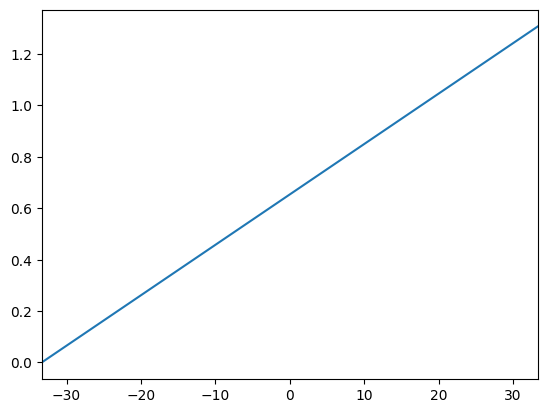

Value function


/Users/dc/anaconda3/envs/journey_1/lib/python3.10/site-packages/HARK/utilities.py:139: RuntimeWarning: divide by zero encountered in reciprocal
  return c ** (1.0 - gam) / (1.0 - gam)


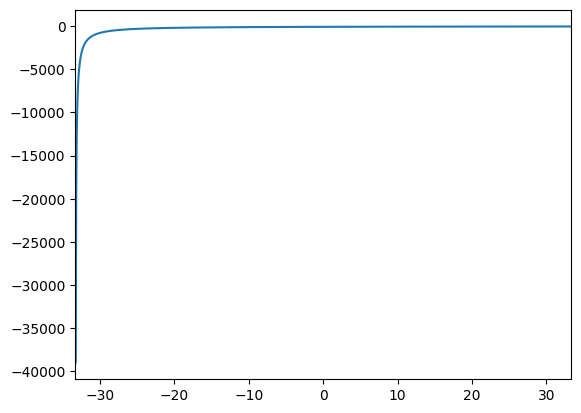

In [10]:
min_v = Example_agent_2.solution[0].mNrmMin
max_v = -Example_agent_2.solution[0].mNrmMin
print("Consumption function")
plot_funcs([Example_agent_2.solution[0].cFunc],min_v,max_v)
print("Value function")
plot_funcs([Example_agent_2.solution[0].vFunc],min_v,max_v)

## Simulation

Next step is to simulate the agent behavior. To do so, you first need to set a few parameters for the sake of the simulation:

- $\texttt{AgentCount}$: number of simulated agents
- $\texttt{T_cycle}$: logical parameter which governs the time flow during the simulation (if it is moving forward or backward)
- $\texttt{T_sim}$: number of simulation periods
- $\texttt{T_age}$: Age after which simulated agents die with certainty

Moreover, HARK enables simulation of the model with the log-normal distributions of the initial assets and incomes. You need to set the parameters:

- $\texttt{aNrmInitMean}$: Mean of log initial assets
- $\texttt{aNrmInitStd}$: Standard deviation of log initial assets
- $\texttt{pLvlInitMean}$: Mean of log initial permanent income
- $\texttt{pLvlInitStd}$: Standard deviation of log initial permanent income

Lastly, using HARK agent type class, you can also set the aggregate income increase (so that the rate of the income increase is common to all agents). You may then set a parameter:

- $\texttt{PermGroFacAgg}$: Aggregate permanent income growth factor

In our example, we simulate 1 agent, as it is a representative agent model. Time flow is chronological and there is no initial heterogeneity. Thus, std of the initial assets and income distributions are set to 0. The initial assets and income are set to 1.0. There is no aggregate income increase, so we set the income growth factor to 1. We simulate 1000 periods and assume an infinitely lived agent. 

To declare the values of these parameters, we create a new dictionary:  

In [11]:
Simulation_dictionary = {  'AgentCount': 1,
                           'aNrmInitMean' : 0.0,
                           'aNrmInitStd' : 0.0,
                           'pLvlInitMean' : 0.0,
                           'pLvlInitStd' : 0.0,
                           'PermGroFacAgg' : 1.0,
                           'T_cycle' : 1,
                           'T_sim' : 1000,
                           'T_age' : None  
                          }


Next, you need to update the object. To do so we use **setattr** function, which adds the parameters' values to the defined agent object.

In [12]:
for key,value in Simulation_dictionary.items():
    setattr(Example_agent_2,key,value)

Finally, you can start our simulation. First, you need to decide which variables you want to track, we choose an assets level and consumption level, in the code they are called: $\texttt{aNrmNow}$ and $\texttt{cNrmNow}$. Next, you need to initialize the simulation by $\texttt{initialize_sim}$ method. Lastly, run the simulation with the $\texttt{simulate}$ method.  

In [13]:
Example_agent_2.track_vars = ['aNrm','cNrm'] # should these be 'aLvl, cLvl' since the normalized versions of these variables isn't introduced until the next section?
Example_agent_2.initialize_sim()
Example_agent_2.simulate()

{'aNrm': array([[1.33647048e+00],
        [1.67623840e+00],
        [2.01933608e+00],
        [2.36579615e+00],
        [2.71565156e+00],
        [3.06893558e+00],
        [3.42568182e+00],
        [3.78592421e+00],
        [4.14969700e+00],
        [4.51703480e+00],
        [4.88797255e+00],
        [5.26254552e+00],
        [5.64078934e+00],
        [6.02273998e+00],
        [6.40843378e+00],
        [6.79790741e+00],
        [7.19119792e+00],
        [7.58834271e+00],
        [7.98937956e+00],
        [8.39434660e+00],
        [8.80328236e+00],
        [9.21622573e+00],
        [9.63321598e+00],
        [1.00542928e+01],
        [1.04794962e+01],
        [1.09088666e+01],
        [1.13424449e+01],
        [1.17802723e+01],
        [1.22223904e+01],
        [1.26688413e+01],
        [1.31196675e+01],
        [1.35749119e+01],
        [1.40346177e+01],
        [1.44988286e+01],
        [1.49675889e+01],
        [1.54409430e+01],
        [1.59189360e+01],
        [1.64016135e+01],
    

##  Plotting the simulation

Plotting the simulation is a little bit more complicated than plotting the solution, as you cannot use a dedicated function. Instead, we will use the **matplot** library in the following way. 

To see the consumption and asset history, we can use objects created by the simulation which contain the history of every agent in each of the simulation periods. These objects have the same naming as the tracked variables with a **\_hist** ending. Thus, from the previous example, the history of assets and consumption are called $\texttt{aNrmNow_hist}$ and $\texttt{cNrmNow_hist}$. 

Let's make a plot of the assets level and consumption level during the simulated periods. First, define the vectors of mean assets and consumption. Here, there is only one consumer, so we do not need to use a mean function (although it is done so here). However, if you want to plot the mean asset/consumption level for many agents, you will need to use this method. 


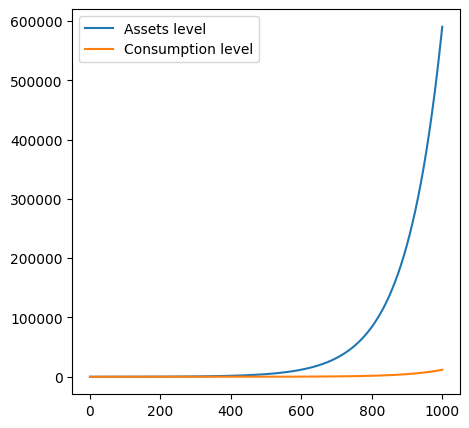

In [14]:
periods= np.linspace(0,1000,1000)
asset_level = np.mean(Example_agent_2.history['aNrm'][0:1000], axis = 1)
cons_level = np.mean(Example_agent_2.history['cNrm'][0:1000], axis = 1)

plt.figure(figsize=(5,5))
plt.plot(periods,asset_level,label='Assets level')
plt.plot(periods,cons_level,label='Consumption level')
plt.legend(loc=2)
plt.show()



Now, let's plot the mean asset and consumption increase: 

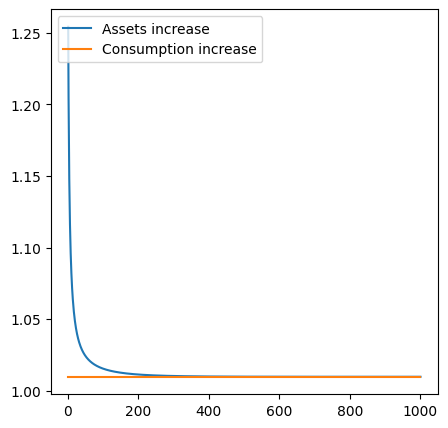

In [15]:
increase_assets = asset_level[1:1000]/asset_level[0:999] 
increase_cons = cons_level[1:1000]/cons_level[0:999] 
plt.figure(figsize=(5,5))
plt.plot(periods[1:1000],increase_assets, label='Assets increase' )
plt.plot(periods[1:1000],increase_cons,label='Consumption increase')
plt.legend(loc=2)
plt.show()

## Exercise

Congratulations! You've just learned the basics of the agent-type class in HARK. It is time for some exercises:

    

### Exercise 1: create the agent-type object

Define a dictionary and then use it to create the agent-type object with the parameters:

- $\beta = 0.96$
- $\rho = 2.0$
- $T = \infty$
- Risk free interest rate $R= 1.05$
Assume no survival uncertainty  and income growth factor 1.01


In [16]:
#Write your solution here

# fill the dictionary and then use it to create the object

#First_dictionary = {
#    'CRRA' : ,
#    'DiscFac' : ,
#    'Rfree' : ,
#    'cycles' : ,
#    'LivPrb' : [],
#    'PermGroFac' : [],
#}
#Exercise_agent = 

**Solution**: click on the box on the left to expand the solution

In [17]:
#Solution
First_dictionary = {
    'CRRA' : 2.0,
    'DiscFac' : 0.96,
    'Rfree' : 1.05,
    'cycles' : 0,
    'LivPrb' : [1.0],
    'PermGroFac' : [1.0],
}
Exercise_agent = PerfForesightConsumerType(**First_dictionary)

### Exercise 2: Solve the model and plot the value function



In [18]:
#Write your solution here, use methods from "solving the model" subsection

**Solution**: click on the box on the left to expand the solution

Value function


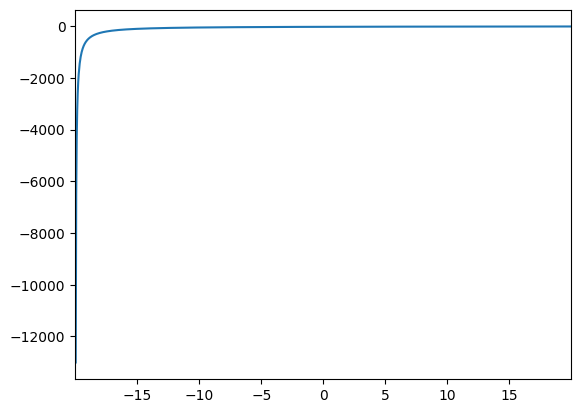

In [19]:
#Solution
Exercise_agent.solve()

min_v = Exercise_agent.solution[0].mNrmMin
max_v = -Exercise_agent.solution[0].mNrmMin
print("Value function")
plot_funcs([Exercise_agent.solution[0].vFunc],min_v,max_v)

### Exercise 3: Prepare the simulation

Next prepare the simulation. Assume that **there exsists the initial assets and income heterogenity**. Assume, the initial income and assets distributions are log-normal, have mean 1 and std 1. Simulate 1000 agents for 1000 periods.   

Add the new parameters to the object:

In [20]:
#Write your solution here. 

#Fill the dictionary
#Simulation_dictionary = {  'AgentCount': ,
#                           'aNrmInitMean' : ,
#                           'aNrmInitStd' : ,
#                           'pLvlInitMean' : ,
#                           'pLvlInitStd' : ,
#                           'PermGroFacAgg' : 1.0, #assume no income aggregate growth
#                           'T_cycle' : 1, #assume forward time flow
#                           'T_sim' : , 
#                           'T_age' : None #assume immortal agents  
#                          }

#for key,value in Simulation_dictionary.items():
#    setattr(Exercise_agent,key,value)


**Solution**: click on the box on the left to expand the solution

In [21]:
#Solution
Simulation_dictionary = {  'AgentCount': 1000,
                           'aNrmInitMean' : 1.0,
                           'aNrmInitStd' : 1.0,
                           'pLvlInitMean' : 1.0,
                           'pLvlInitStd' : 1.0,
                           'PermGroFacAgg' : 1.0,
                           'T_cycle' : 1,
                           'T_sim' : 1000,
                           'T_age' : None  
                          }

for key,value in Simulation_dictionary.items():
    setattr(Exercise_agent,key,value)

### Exercise 4: Simulate 



In [22]:
#Write your solution here. Use the commands from "simulation" subsection, track consumption values


**Solution**: click on the box on the left to expand the solution

In [23]:
#Solution
Exercise_agent.track_vars = ['aNrm','cNrm']
Exercise_agent.initialize_sim()
Exercise_agent.simulate()

{'aNrm': array([[1.98852329e+01, 2.43139510e+00, 3.80130444e+00, ...,
         2.17778682e+00, 9.03301714e+00, 1.32631458e+00],
        [2.00444516e+01, 2.52093985e+00, 3.89631773e+00, ...,
         2.26631919e+00, 9.14891491e+00, 1.41144796e+00],
        [2.02043060e+01, 2.61084205e+00, 3.99171031e+00, ...,
         2.35520497e+00, 9.26527533e+00, 1.49692118e+00],
        ...,
        [2.09754758e+03, 1.17091038e+03, 1.24363989e+03, ...,
         1.15744613e+03, 1.52139540e+03, 1.11224084e+03],
        [2.10600062e+03, 1.17566438e+03, 1.24868421e+03, ...,
         1.16214638e+03, 1.52754850e+03, 1.11676063e+03],
        [2.11448741e+03, 1.18043736e+03, 1.25374868e+03, ...,
         1.16686539e+03, 1.53372616e+03, 1.12129847e+03]]),
 'cNrm': array([[ 1.82774668,  1.0279216 ,  1.09069793, ...,  1.01629996,
          1.33044205,  0.9772811 ],
        [ 1.83504291,  1.03202501,  1.09505193, ...,  1.02035697,
          1.33575309,  0.98118235],
        [ 1.84236826,  1.03614479,  1.0994233

### Exercise 5: Plot the simulations

Plot mean consumption level and consumption increase: 

In [24]:
#Write your solution here.

#Firstly prepare the vectors which you would like to plot:
#periods= np.linspace(0,1000,1000)
#cons_level = np.mean(Exercise_agent.cNrmNow_hist[0:1000], axis = 1)
#increase_cons = cons_level[1:1000]/cons_level[0:999] 

#next plot your solution


**Solution**: click on the box on the left to expand the solution

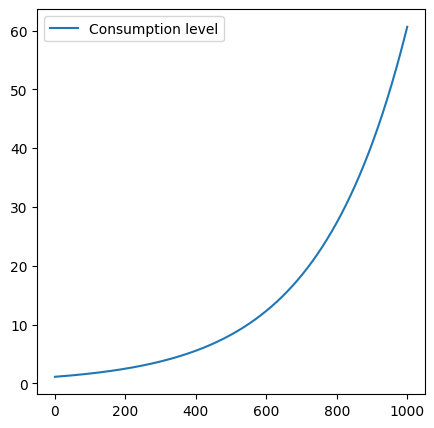

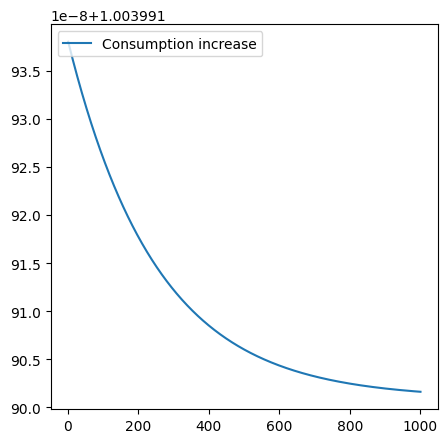

In [25]:
#Solution
periods= np.linspace(0,1000,1000)
cons_level = np.mean(Exercise_agent.history['cNrm'][0:1000], axis = 1)
increase_cons = cons_level[1:1000]/cons_level[0:999]

plt.figure(figsize=(5,5))
plt.plot(periods,cons_level,label='Consumption level')
plt.legend(loc=2)
plt.show()

plt.figure(figsize=(5,5))
plt.plot(periods[1:1000],increase_cons,label='Consumption increase')
plt.legend(loc=2)
plt.show()


# PART II: advanced methods for the perfect foresight agent

In this part we focus on more complicated cases of the deterministic agent model.

In the previous example survival probability (in the code **LivPrb**) and income increase factor (in the code **PermGroFac**) were stable and set to 1. However, if you want to build deterministic life-cycle model you need to add a age-dependent survival probability or income growth. Consumer problem in this setting is:
\begin{eqnarray*}
V_t(M_t,Y_t) &=& \max_{C_t}~U(C_t) + \beta \pi_t V_{t+1}(M_{t+1},Y_{t+1}), \\
& s.t. & \\
%A_t &=& M_t - C_t, \\
M_{t+1} &=& R (M_{t}-C_{t}) + Y_{t+1}, \\
Y_{t+1} &=& \Gamma_{t+1} Y_t, \\
\end{eqnarray*}

Where $Y_t$ is an age-dependent income, $\pi_t$ is a survival  probability and $\Gamma_{t+1}$ is an income growth rate. Also $\pi_{T+1} =0$ 

While it does not reduce the computational complexity of the problem (as permanent income is deterministic, given its initial condition $Y_0$), HARK represents this problem with normalized variables (represented in lower case), dividing all real variables by permanent income $Y_t$ and utility levels by $Y_t^{1-\rho}$. The Bellman form of the model thus reduces to:

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t}~U(c_t) ~+ \beta_{t+1}\pi_{t+1} \Gamma_{t+1}^{1-\rho} v_{t+1}(m_{t+1}), \\
& s.t. & \\
a_t &=& m_t - c_t, \\
m_{t+1} &=&  R / \Gamma_{t+1} a_t + 1.
\end{eqnarray*}

To solve this problem we need to study the **cycles** parameter more carefully.


## Cycles and time-dependent parameters 

$\texttt{cycles}$ parameter has more general usage than it was presented in the previous example. In general it tells HARK **how many times the one period consumer's problem needs to be solved with the given set of time-changing paramters**. In our microeconomic case these parameters are $\texttt{LivPrb}$ and $\texttt{PermGroFac}$, as the discount factor, the CRRA parameter and risk free interest rate are assumed to be stable.   

For the life cycle model, **the survival probabilities and income growth rates are different in each period** and consumer **never faces the same parameter's combination**. Thus in the HARK implementation, you need to set cycles = 1. To set the length    of the lifespan, you simply need to specify the survival probabilities and the income growth vectors, with T+1 non-zero values.      

For example, we create an agent-type object with with maximal lifespan set to 11, and decreasing survival probability and inverse u-shaped income dynamics up to period 6 (then consumer retired and obtain )

In [26]:
LifeCycle_dictionary = {
    'CRRA' : 2.0,
    'Rfree' : 1.04,
    'DiscFac' : 0.98,
    'LivPrb' : [0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90],
    'PermGroFac' : [1.01,1.01,1.01,1.02,1.00,0.99,0.5,1.0,1.0,1.0],
    'cycles' : 1,
}

LC_agent = PerfForesightConsumerType(**LifeCycle_dictionary)



## Understanding the solution 

As it was mentioned in the first part of the tutorial, solve method finds value and consumption function. In case of $\Gamma_t \neq 1.0$, these functions are defined on the **normalized by $Y_t$** space of  the cash-in hands arguments. It is important to remember that, when you will plot them. 

Nevertheless, as in the first part, to solve the model, we use the $\texttt{solve}$ method. 

In [27]:
LC_agent.solve()

### Quick exercise

Consider the case, when consumer lives with certainty 40 periods. However, her income perform cycles. During each cycles she experience two periods of the income increase and two of the decrease.
Create HARK agent-type object with the described above income cycles. Solve the model. 

Assume that for each cycle the income growth factors are: [1.05,1.1, 0.95, 0.92]. Assume, that survival probability is 1 and the rest of the parameters is the same as in the previous example. 
 

In [28]:
#Write your solution here

**Solution**: click on the box on the left to expand the solution

In [29]:
#Solution
Cyc_dictionary = {
    'CRRA' : 2.0,
    'Rfree' : 1.03,
    'DiscFac' : 0.96,
    'LivPrb' : [1.05,1.1, 0.95, 0.92],
    'PermGroFac' : 4*[1.0],
    'cycles' : 4,
}

Cyc_agent = PerfForesightConsumerType(**Cyc_dictionary)
Cyc_agent.solve()


### Methods of plotting the solution

$\texttt{plot_funcs()}$ enables to plot many functions at the same graph. You need to declare them as vector of functions. 

To see this, just follow an example. We plot the consumption functions for each age $t$ of the consumer. 

To get better access to the consumption functions, you can use $\texttt{unpack('cFunc')}$ method, which will create the attribute $\texttt{cFunc}$ of the object (so you do not have to use it is as a solution attribute).


In [30]:
LC_agent.unpack('cFunc')

Next, we set the minimal value of the gird such that at least one of the consumption functions is defined.


Consumption functions


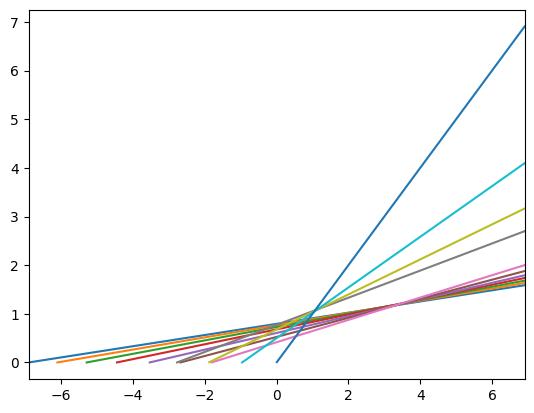

In [31]:
min_v = min(LC_agent.solution[t].mNrmMin for t in range(11) )
max_v = -min_v
print("Consumption functions")
plot_funcs(LC_agent.cFunc[:],min_v,max_v)



If you want to compare a few functions (eg. value functions), you can also construct the vector by yourself, for example:


Value functions


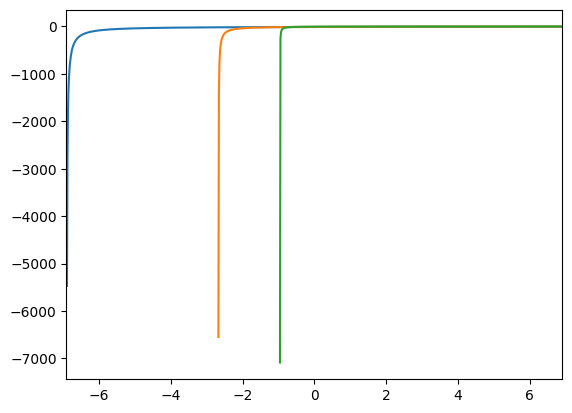

In [32]:
print("Value functions")
plot_funcs([LC_agent.solution[0].vFunc, LC_agent.solution[5].vFunc, LC_agent.solution[9].vFunc],min_v,max_v)


## Advanced simulation techniques
Here we present more advanced simulation techniques with the mortal agents and income dynamics.  

We will also present how to plot the distribution of assets among the agents. 

First, as in the part 1 of the tutorial, you need to define the simulation dictionary. However, you need to be careful with T_age parameter: because a maximal lifespan is 11 (T=10), T_age is set to 10, to ensure that all agents die after this age. 

For the rest of the parameters, we set the number of consumers alive in each period to 1000. Initial asset level is near 0 (log of -10). The initial income level is given by the log-normal distribution with mean 0 and std 1. We set the rest of parameters as in the previous example.    


In [33]:
Simulation_dictionary = {  'AgentCount': 1000,
                           'aNrmInitMean' : -10.0,
                           'aNrmInitStd' : 0.0,
                           'pLvlInitMean' : 0.0,
                           'pLvlInitStd' : 1.0,
                           'PermGroFacAgg' : 1.0,
                           'T_cycle' : 1,
                           'T_sim' : 200,
                           'T_age' : 10  
                          }

for key,value in Simulation_dictionary.items():
    setattr(LC_agent,key,value)

Next, we simulate the economy and plot the mean asset level. However, be careful! $\texttt{aNrmNow}$ gives the asset levels normalized by the income. To get the original asset level we need to use $\texttt{aLvlNow}$ (unfortunately, cLvlNow is not implemented).      

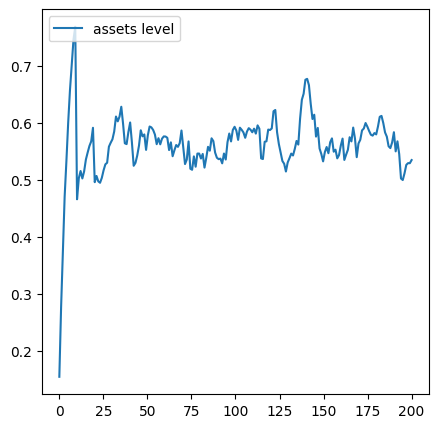

In [34]:
LC_agent.track_vars = ['aNrm','cNrm', 'aLvl']
LC_agent.initialize_sim()
LC_agent.simulate()

    
periods= np.linspace(0,200,200)
assets_level = np.mean(LC_agent.history['aLvl'][0:200], axis = 1)

plt.figure(figsize=(5,5))
plt.plot(periods,assets_level,label='assets level')
plt.legend(loc=2)
plt.show()

As you can see, for the first 10 periods the asset level much more fluctuate. It is because in the first periods the agents which were born in period 0 strictly dominate the population (as only a small fraction die in the first periods of life). 

You can simply cut the first observations, to get asset levels for more balanced population.   

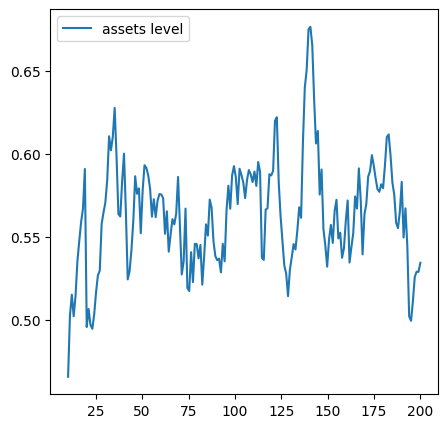

In [35]:
after_burnout = np.mean(LC_agent.history['aLvl'][10:200], axis = 1)

plt.figure(figsize=(5,5))
plt.plot(periods[10:200],after_burnout,label='assets level')
plt.legend(loc=2)
plt.show()

### Plotting the distribution of assets

When you plot similar simulations, often the main interest is not to get exact assets/consumption levels during the simulation but rather a general distribution of assets. 

In our case, we plot the asset distribution. 

First, get one vector of the asset levels: 


In [36]:
sim_wealth = np.reshape(LC_agent.history['aLvl'],-1)

Next, we plot simple histogram of assets level using a standard **hist** function from matplotlib library

Wealth distribution histogram


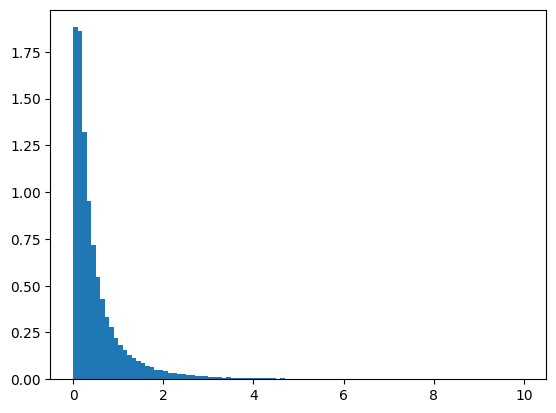

In [37]:
print("Wealth distribution histogram")
n, bins, patches = plt.hist(sim_wealth,100,density=True, range=[0.0,10.0])

With HARK, you can also easily plot the Lorenz curve. To do so import some HARK utilities which help us plot Lorenz curve:

In [38]:

from HARK.utilities import get_lorenz_shares, get_percentiles


Then, use $\texttt{get_lorenz_shares}$ to plot the Lornez curve. 

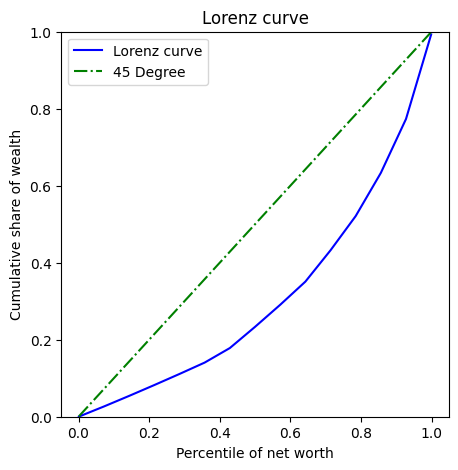

In [42]:
pctiles = np.linspace(0.001,0.999,15)
#SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)

plt.figure(figsize=(5,5))
plt.title('Lorenz curve')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Lorenz curve')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
plt.show()

## Exercise 

Let's make a model with a little more realistic assumptions. 

In files 'life_table.csv' you find the death-probablities for Americans in age 25-105 in 2017 from Human Mortality Database. The age-dependent income for American males in file 'productivity_profile.csv' are deduced from Heathcote et al. (2010). Try to build a model with this data, assuming additionaly CRRA parameter to be 2.0, discount rate set to 0.99 and interest rate set to 1.05. Moreover, assume that initial income is given by log-normal distribution with mean 0 and std 0.05. Assume that initial asset is near 0 for all agents.

Do the following tasks:
- Build a dictionary and create an object with a given data and parameters
- Solve model and plot a consumption functions for each age
- Simulate 1000 agents for 2000 periods
- Plot a histogram of the assets distribution and the Lorenz curve

In [40]:
# Write your solution here 

#Firstly import data, you can use this part of code (however, there are other ways to do this)
import sys 
import os

sys.path.insert(0, os.path.abspath('..'))


prob_dead = np.genfromtxt('life_table.csv', delimiter=',', skip_header =1)
prob_surv = 1 - prob_dead

# The HARK argument need to be a list, thus convert it from numpy array
prob_surv_list= np.ndarray.tolist(prob_surv[:80])

income_profile = np.genfromtxt('productivity_profile.csv', delimiter=',', skip_header =1)
income_profile_list=np.ndarray.tolist(income_profile[:80])

#Continue your solution


**Solution**: click on the box on the left to expand the solution

Consumption functions


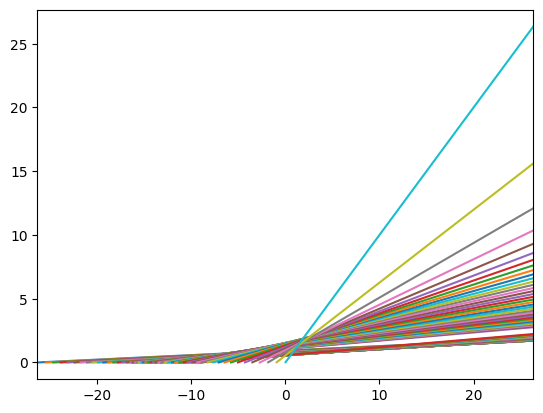

Wealth distribution histogram


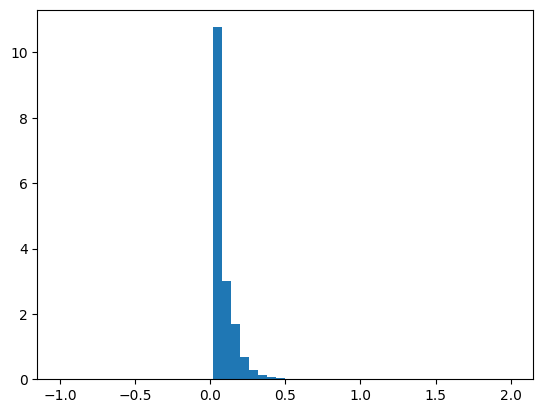

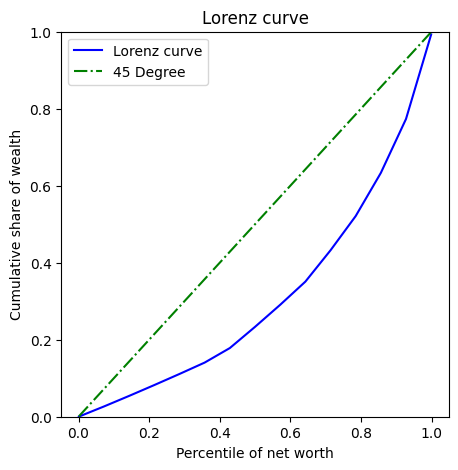

In [41]:
import sys 
import os

sys.path.insert(0, os.path.abspath('..'))


prob_dead = np.genfromtxt('life_table.csv', delimiter=',', skip_header =1)
prob_surv = 1 - prob_dead
prob_surv_list= np.ndarray.tolist(prob_surv[:80])

income_profile = np.genfromtxt('productivity_profile.csv', delimiter=',', skip_header =1)
income_profile_list=np.ndarray.tolist(income_profile[:80])

Ex_dictionary = {
    'CRRA' : 2.0,
    'Rfree' : 1.05,
    'DiscFac' : 0.99,
    'LivPrb' : prob_surv_list,
    'PermGroFac' : income_profile_list,
    'cycles' : 1,
    'T_cycle' : 1,
}

Ex_agent = PerfForesightConsumerType(**Ex_dictionary)
Ex_agent.solve()

Ex_agent.unpack('cFunc')

min_v = min(Ex_agent.solution[t].mNrmMin for t in range(11) )
max_v = -min_v
print("Consumption functions")
plot_funcs(Ex_agent.cFunc[:],min_v,max_v)


Simulation_dictionary = {  'AgentCount': 1000,
                           'aNrmInitMean' : -10.0,
                           'aNrmInitStd' : 0.0,
                           'pLvlInitMean' : 0.0,
                           'pLvlInitStd' : 0.05,
                           'PermGroFacAgg' : 1.0,
                           'T_cycle' : 1,
                           'T_sim' : 2000,
                           'T_age' : 80,
                           'BoroCnstArt' : 0.0, 
                          }

for key,value in Simulation_dictionary.items():
    setattr(Ex_agent,key,value)

Ex_agent.track_vars = ['aNrm','cNrm', 'aLvl']
Ex_agent.initialize_sim()
Ex_agent.simulate()


sim_wealth = np.reshape(Ex_agent.history['aLvl'],-1)
print("Wealth distribution histogram")
n, bins, patches = plt.hist(sim_wealth,50,density=True, range=[-1.0,2.0])

pctiles = np.linspace(0.001,0.999,15)
#SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)

plt.figure(figsize=(5,5))
plt.title('Lorenz curve')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Lorenz curve')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
plt.show()